In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


In [2]:
df_rainfall = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 29 - Rainfall Prediction\Rainfall.csv')
df = df_rainfall.copy()

In [3]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [5]:
df = df.rename(columns = {'         winddirection':'winddirection'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [7]:
df.rainfall.value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [8]:
df['rainfall'] = df['rainfall'].apply(lambda x: 1 if x == 'yes' else 0)

In [9]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [10]:
df[df.isna().any(axis = 1)]

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
160,9,1005.7,31.7,28.2,26.6,25.7,86,79,1,6.5,NaN,NaN


In [11]:
df = df.dropna()

In [12]:
df.corr()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
day,1.000000,0.042125,-0.015136,-0.012458,-0.007484,-0.049619,-0.117584,-0.112503,0.011796,0.110170,0.042203,-0.031906
pressure,0.042125,1.000000,-0.828670,-0.851628,-0.839583,-0.859880,-0.273631,0.006881,-0.087161,-0.196850,-0.662586,0.374046
maxtemp,-0.015136,-0.828670,1.000000,0.986189,0.961461,0.899588,0.020450,-0.291071,-0.102922,0.506863,0.629555,-0.442357
temparature,-0.012458,-0.851628,0.986189,1.000000,0.990173,0.936769,0.090893,-0.206894,-0.038905,0.419919,0.648865,-0.393739
mintemp,-0.007484,-0.839583,0.961461,0.990173,1.000000,0.944409,0.137901,-0.157112,-0.009294,0.367565,0.633513,-0.359130
dewpoint,-0.049619,-0.859880,0.899588,0.936769,0.944409,1.000000,0.424493,0.043753,0.138386,0.184151,0.628190,-0.378435
humidity,-0.117584,-0.273631,0.020450,0.090893,0.137901,0.424493,1.000000,0.655338,0.489075,-0.564896,0.101237,-0.076613
cloud,-0.112503,0.006881,-0.291071,-0.206894,-0.157112,0.043753,0.655338,1.000000,0.625602,-0.849337,-0.076168,0.258400
rainfall,0.011796,-0.087161,-0.102922,-0.038905,-0.009294,0.138386,0.489075,0.625602,1.000000,-0.554083,-0.013214,0.154488
sunshine,0.110170,-0.196850,0.506863,0.419919,0.367565,0.184151,-0.564896,-0.849337,-0.554083,1.000000,0.253261,-0.298892


In [13]:
corr_matrix = df.corr()
rainfall_corr = corr_matrix['rainfall']
high_corr_pairs = corr_matrix[(corr_matrix > 0.9) & (corr_matrix < 1.0)].stack().reset_index()
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

high_corr_pairs['Feature_1_to_rainfall'] = high_corr_pairs['Feature_1'].map(rainfall_corr)
high_corr_pairs['Feature_2_to_rainfall'] = high_corr_pairs['Feature_2'].map(rainfall_corr)

high_corr_pairs

# remove min temp, and temparature as seen to have high correlation with rainfall. 
# extreme temperature is a trigger for a rainfall to happen
# dewpoint is definitely something to keep, high corr and indication of moisture in the aire

,Feature_1,Feature_2,Correlation,Feature_1_to_rainfall,Feature_2_to_rainfall
0,maxtemp,temparature,0.986189,-0.102922,-0.038905
1,maxtemp,mintemp,0.961461,-0.102922,-0.009294
2,temparature,maxtemp,0.986189,-0.038905,-0.102922
3,temparature,mintemp,0.990173,-0.038905,-0.009294
4,temparature,dewpoint,0.936769,-0.038905,0.138386
5,mintemp,maxtemp,0.961461,-0.009294,-0.102922
6,mintemp,temparature,0.990173,-0.009294,-0.038905
7,mintemp,dewpoint,0.944409,-0.009294,0.138386
8,dewpoint,temparature,0.936769,0.138386,-0.038905
9,dewpoint,mintemp,0.944409,0.138386,-0.009294


In [14]:
df = df.drop(columns = ['mintemp', 'temparature'])

<Axes: >

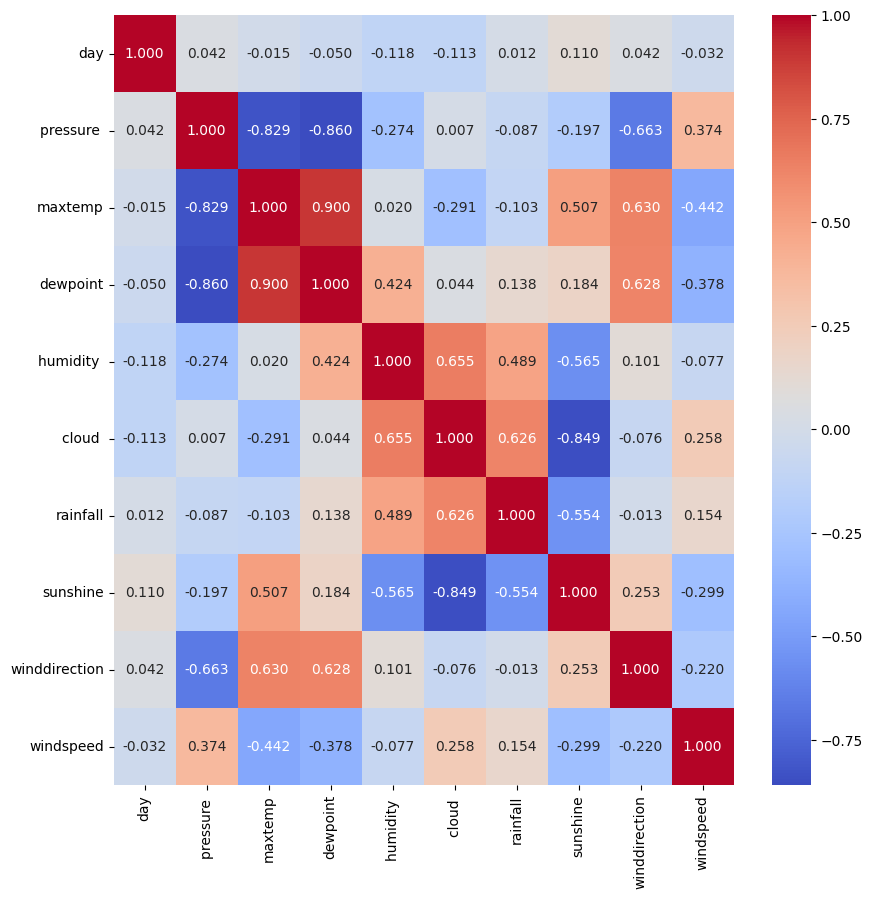

In [15]:
plt.figure(figsize= (10, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.3f')

In [16]:
# Question: should we respect the day? -- no as this was just counting the number of days per month not unless we have the complete date

df['day'].value_counts()

day
1     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
10    12
11    12
12    12
14    12
13    12
15    12
16    12
24    12
17    12
18    12
19    12
20    12
21    12
22    12
23    12
28    12
25    12
26    12
27    12
29    12
9     11
30    11
31     7
Name: count, dtype: int64

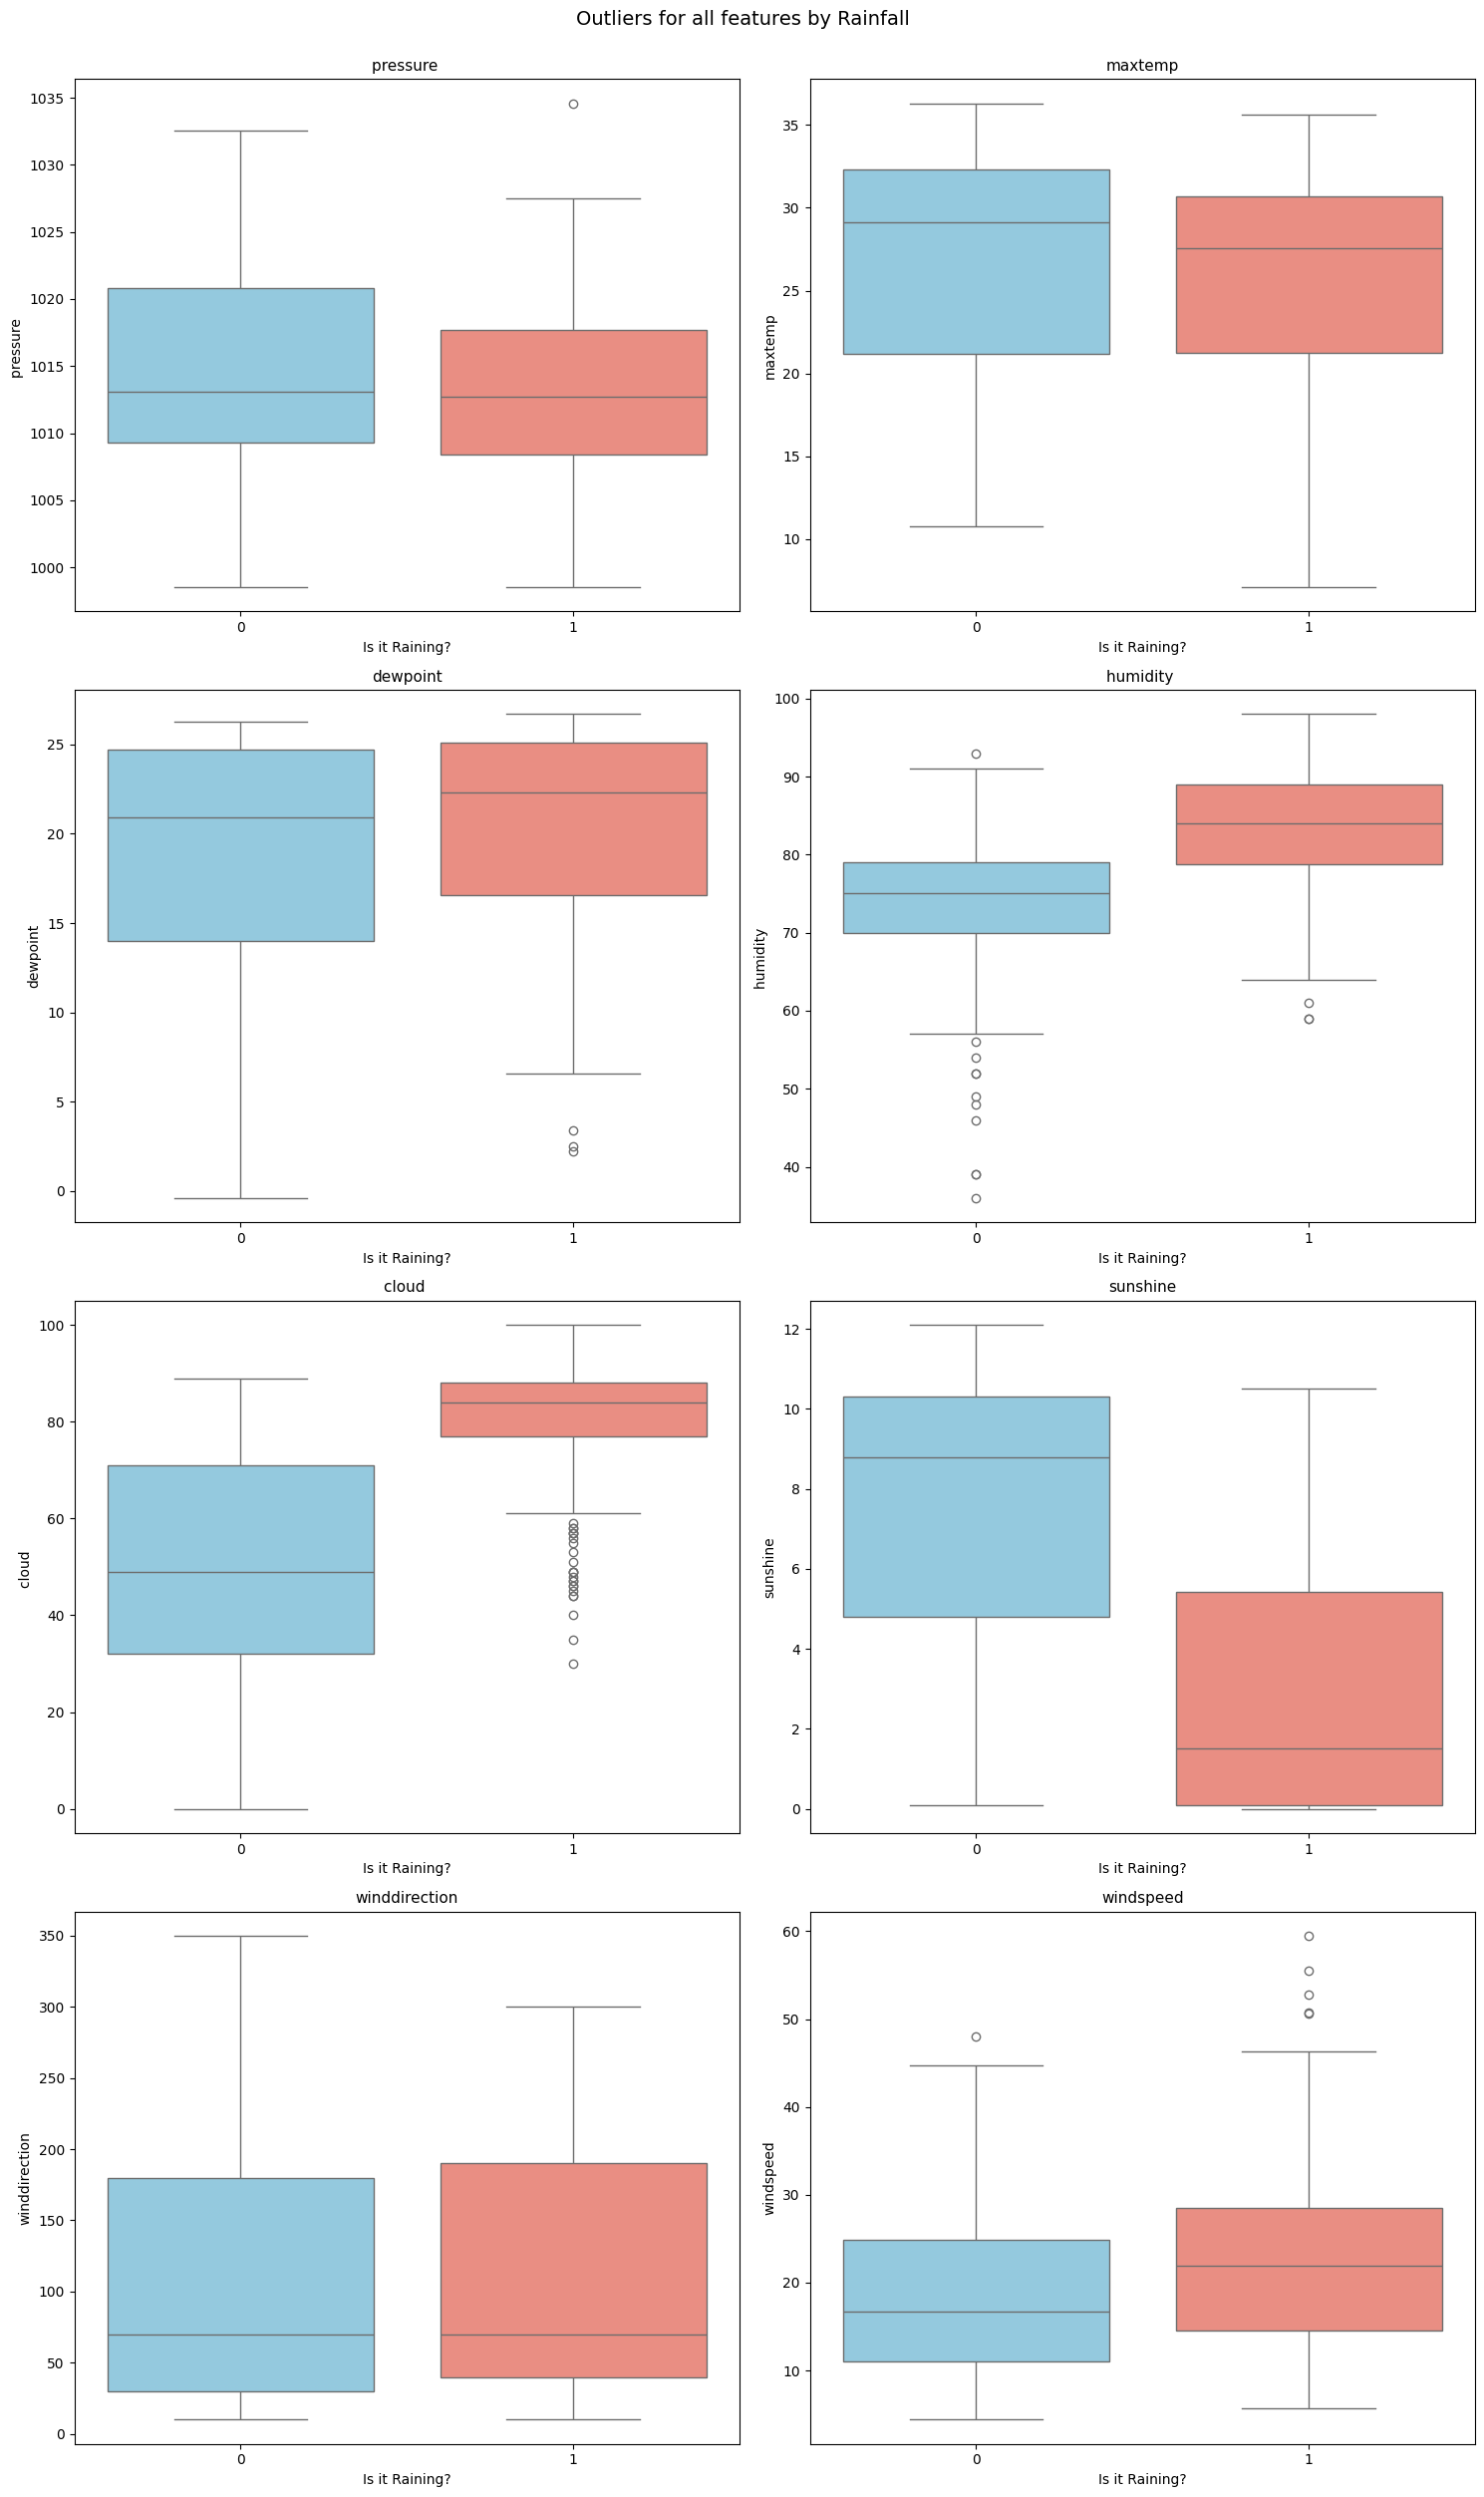

In [17]:
target_cols = list(df.drop(columns= ['day', 'rainfall']).columns)

fig, axes = plt.subplots(4, 2, figsize = (15, 25))

for idx, feature in enumerate(target_cols):
    row = idx // 2
    col = idx % 2
    
    sns.boxplot(data = df, x = 'rainfall', y = feature, hue = 'rainfall', ax= axes[row, col],
                palette= ['skyblue', 'salmon'], legend = False)
    axes[row, col].set_title(f'{feature}', fontsize = 11)
    axes[row, col].set_xlabel('Is it Raining?')
    axes[row, col].set_ylabel(feature)

plt.suptitle('Outliers for all features by Rainfall', fontsize = 14, y = 1.00)
plt.tight_layout()
plt.show()

# outliers seems to be normal, no features need to be removed.

In [18]:
X = df.drop(columns = ['day','rainfall'])
y = df['rainfall']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2, stratify= y)

In [20]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
models = {
    'Logistic Regression':{
        'model': LogisticRegression(random_state= 2),
        'params':{
            'C': [0.01, 0.05, 0.1],
            'penalty': ['l2'],
            'class_weight':['balanced']
        }
    },
    'Random Forest':{
        'model': RandomForestClassifier(random_state = 2),
        'params':{
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', None],
            'n_estimators': [100, 200],
            'class_weight': ['balanced']
        }
    },
    'SVC':{
        'model': SVC(random_state= 2),
        'params':{
            'C':[0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'class_weight': ['balanced']
        }
    },
    'XGBoost':{
        'model': XGBClassifier(random_state = 2),
        'params':{
            'max_depth': [2, 3],
            'learning_rate': [0.01, 0.05],
            'min_child_weight':[5, 10],
            'subsample': [0.6, 0.7],
            'n_estimators': [100, 200],
            'reg_alpha': [0.1, 1],
            'reg_lambda': [1, 2]
        }
    },
    'LightBGM':{
        'model': LGBMClassifier(random_state = 2, verbose = -1),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'num_leaves': [31, 50],
            'min_child_samples': [20, 30],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'class_weight': ['balanced']
        }
    },
    'Catboost':{
        'model': CatBoostClassifier(random_state = 2, verbose = 0),
        'params':{
            'iterations': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'depth': [4, 6, 8],
            'l2_leaf_reg': [1, 3, 5],
            'auto_class_weights': ['Balanced']
        }
    }
}

In [31]:
results = {}
all_models = {}

for name, config in models.items():
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv = 5,
        scoring = 'f1',
        n_jobs = -1,
        verbose = 1
    )

    grid_search.fit(X_train_scaled, y_train)
    all_models[name] = grid_search.best_estimator_

    train_pred = grid_search.best_estimator_.predict(X_train_scaled)
    test_pred = grid_search.best_estimator_.predict(X_test_scaled)

    results[name] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'Train Accuracy': accuracy_score(y_train, train_pred),
        'Test Accuracy': accuracy_score(y_test, test_pred),
        'Train F1': f1_score(y_train, train_pred),
        'Test F1': f1_score(y_test, test_pred),
        'Precision': precision_score(y_test, test_pred),
        'Recall': recall_score(y_test, test_pred)
    }

best_model_name = max(results.keys(), key = lambda x: results[x]['Test F1'])
best_model = results[best_model_name]['best_model']

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [33]:
summary_data = []

for name, result in results.items():
    summary_data.append({
        'Model': name,
        'Train F1': result['Train F1'],
        'Test F1': result['Test F1'],
        'Overfit Gap': result['Train F1'] - result['Test F1'],
        'Precision': result['Precision'],
        'Recall': result['Recall']
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Test F1', ascending = False)
summary_df = summary_df.round(4)
display(summary_df)

,Model,Train F1,Test F1,Overfit Gap,Precision,Recall
3,XGBoost,0.8683,0.8929,-0.0246,0.8065,1.00
1,Random Forest,1.0000,0.8868,0.1132,0.8393,0.94
0,Logistic Regression,0.8355,0.8800,-0.0445,0.8800,0.88
2,SVC,0.8446,0.8687,-0.0241,0.8776,0.86
4,LightBGM,0.9554,0.8627,0.0926,0.8462,0.88
5,Catboost,1.0000,0.8491,0.1509,0.8036,0.90


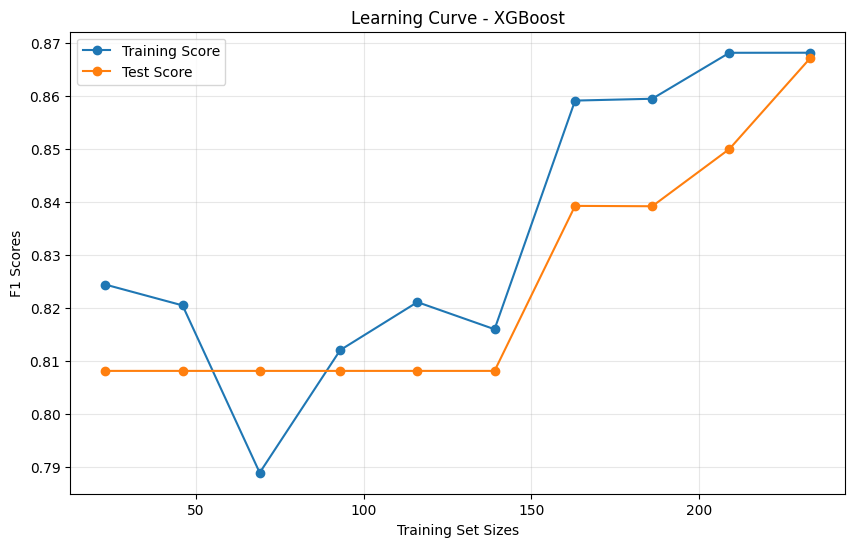

In [35]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model,
    X_train, y_train,
    cv = 5,
    scoring = 'f1',
    train_sizes= np.linspace(0.1, 1.0, 10),
    n_jobs = -1
)

plt.figure(figsize =(10, 6))
plt.plot(train_sizes, train_scores.mean(axis = 1), label = 'Training Score', marker = 'o')
plt.plot(train_sizes, test_scores.mean(axis = 1), label = 'Test Score', marker = 'o')
plt.xlabel('Training Set Sizes')
plt.ylabel('F1 Scores')
plt.title(f'Learning Curve - {best_model_name}')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

In [36]:
cv_scores = cross_val_score(
    best_model,
    X_train_scaled, y_train,
    cv = 5,
    scoring = 'f1'
)

print(f'CV F1 scores:{cv_scores}')
print(f'Mean: {cv_scores.mean():.3f}')
print(f'std:{cv_scores.std():.3f}')

CV F1 scores:[0.87804878 0.86746988 0.88095238 0.83116883 0.87804878]
Mean: 0.867
std:0.019


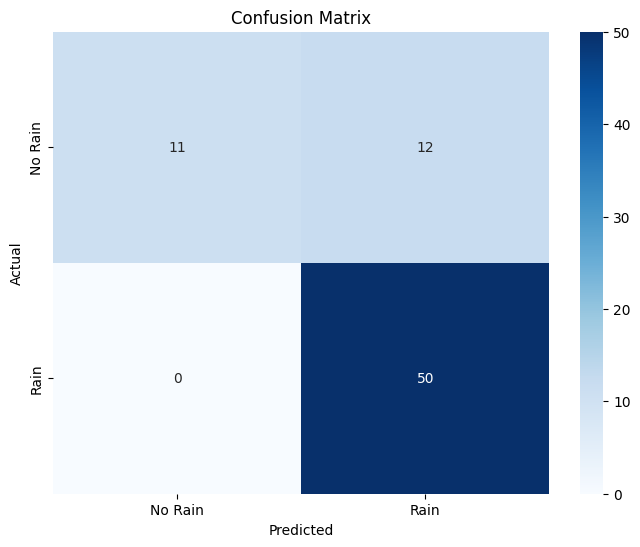

In [37]:
y_pred = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels= ['No Rain', 'Rain'],
            yticklabels= ['No Rain', 'Rain'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()